***Task 4***

In [230]:
#Import needed tools
import random, copy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pyswarm import pso

**I. Generate the noisy data (𝑥_𝑘, 𝑦_𝑘), where 𝑘 = 0,…,1000, according to the rule:**

**y_k = −100 + 𝛿𝑘, 𝑓(𝑥_𝑘) < −100,**

**y_k = 𝑓(𝑥_𝑘) + 𝛿_𝑘, −100 ≤ 𝑓(𝑥_𝑘) ≤ 100,**

**y_k = 100 + 𝛿_𝑘, 𝑓(𝑥_𝑘) > 100,**

**x_k = 3k/1000,**

**𝑓(𝑥) = 1/(x^2-3x+2),**

**where 𝛿𝑘~𝑁(0,1) are values of a random variable with standard normal distribution. Approximate the data by the rational function**

**𝐹(𝑥,𝑎,𝑏,𝑐,𝑑) = (𝑎𝑥 + 𝑏)/(𝑥^2 + 𝑐𝑥 + 𝑑)**

**by means of least squares through the numerical minimization of the following function:**

**𝐷(𝑎,𝑏,𝑐,𝑑) = sum(𝑘=0, 100)((𝐹(𝑥_𝑘,𝑎,𝑏,𝑐,𝑑) − 𝑦_𝑘)^2).**

**To solve the minimization problem, use Nelder-Mead algorithm, Levenberg-Marquardt algorithm and at least two of the methods among Simulated Annealing, Differential Evolution and Particle Swarm Optimization. If necessary, set the initial approximations and other parameters of the methods. Use 𝜀 = 0.001 as the precision; at most 1000 iterations are allowed. Visualize the data and the approximants obtained in a single plot. Analyze and compare the results obtained (in terms of number of iterations, precision, number of function evaluations, etc.).**

    1.0. Generate needed variables

In [228]:
#Generate noisy data
k = np.array([i for i in range(0, 1001)])
x_k = 3 * k / 1000
func = lambda x_k: 1 / (x_k ** 2 - 3 * x_k + 2)
y_k = func(x_k)
eps = 0.001
x0 = np.ones(4)

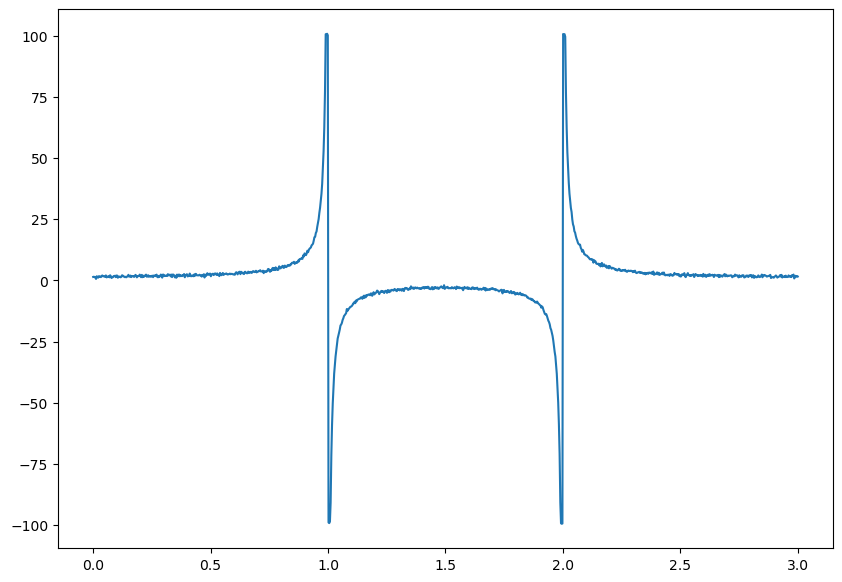

In [45]:
for i in range(len(y_k)):
    if y_k[i] < -100:
        y_k[i] = -100 + np.random.normal(loc = 0.5, scale = 0.25)
    else:
        if y_k[i] > 100:
            y_k[i] = 100 + np.random.normal(loc = 0.5, scale = 0.25)
        else:
            y_k[i] += np.random.normal(loc = 0.5, scale = 0.25)
plt.figure(figsize=(10,7))
plt.plot(x_k,y_k)

    1.1. Creating of functions

        1.1.1. Following functions

In [34]:
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [35]:
def least_squares(vector, func, x, y):
    a, b, c, d = vector
    return np.sum((func(x, a, b, c, d) - y) ** 2)

In [36]:
def least_squares_lm(vector, func, x, y):
    a, b, c, d = vector
    return func(x, a, b, c, d) - y

        1.1.2. Functions of methods

In [46]:
#1. Nelder-Mead Method
nm = optimize.minimize(least_squares, x0, method='nelder-mead', args=(rational_function, x_k, y_k), options={'maxiter': 1000, 'fatol': eps})

In [47]:
#2. Levenberg-Marquardt Method
lm = optimize.least_squares(least_squares_lm, x0, method='lm', args=(rational_function, x_k, y_k), ftol=eps)

In [48]:
#3. Differential Evolution Method
bounds = np.array([[-2, 2], [-2, 2], [-2, 2], [-2, 2]])
de = optimize.differential_evolution(least_squares, bounds, args=(rational_function, x_k, y_k), tol=eps)

In [231]:
#4. Particle Swarm Method
lower_bound = np.ones(4) * -1
upper_bound = np.ones(4)
pso, _ = pso(least_squares, lower_bound, upper_bound, maxiter=1000, args=(rational_function, x_k, y_k), swarmsize=1000, minfunc=eps)

Stopping search: Swarm best objective change less than 0.001


    1.2. Visualization

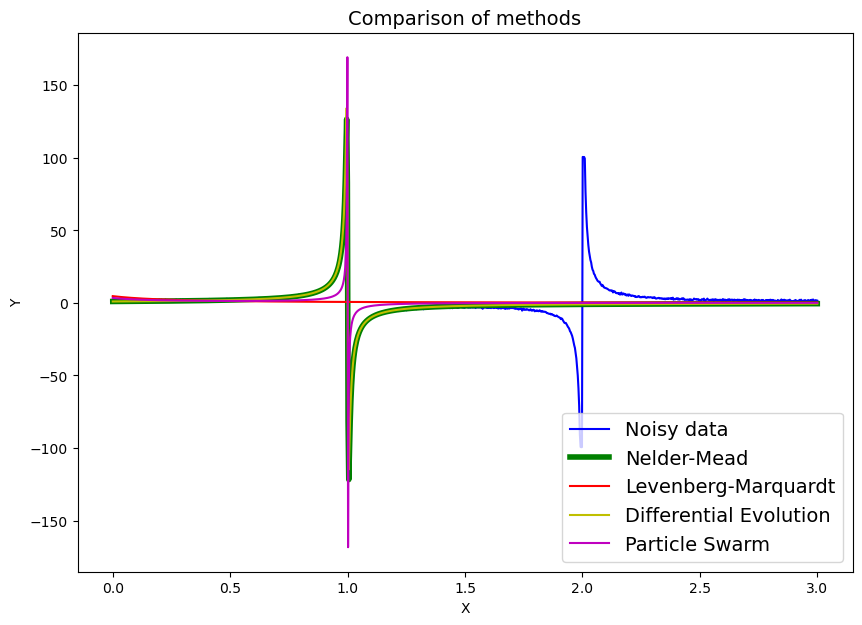

In [94]:
plt.figure(figsize=(10,7))
plt.title('Comparison of methods', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_k, y_k, 'b', label='Noisy data')
plt.plot(x_k, rational_function(x_k, *nm.x), 'g', label="Nelder-Mead", linewidth = 4)
plt.plot(x_k, rational_function(x_k, *lm.x), 'r', label="Levenberg-Marquardt")
plt.plot(x_k, rational_function(x_k, *de.x), 'y', label="Differential Evolution")
plt.plot(x_k, rational_function(x_k, *pso), 'm', label="Particle Swarm")
plt.legend(fontsize=14)

**II. Choose at least 15 cities in the world having land transport connections between them. Calculate the distance matrix for them and then apply the Simulated Annealing method to solve the corresponding Travelling Salesman Problem. Visualize the results at the first and the last iteration. If necessary, use the city dataset from https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html**

    2.1. Get data from file

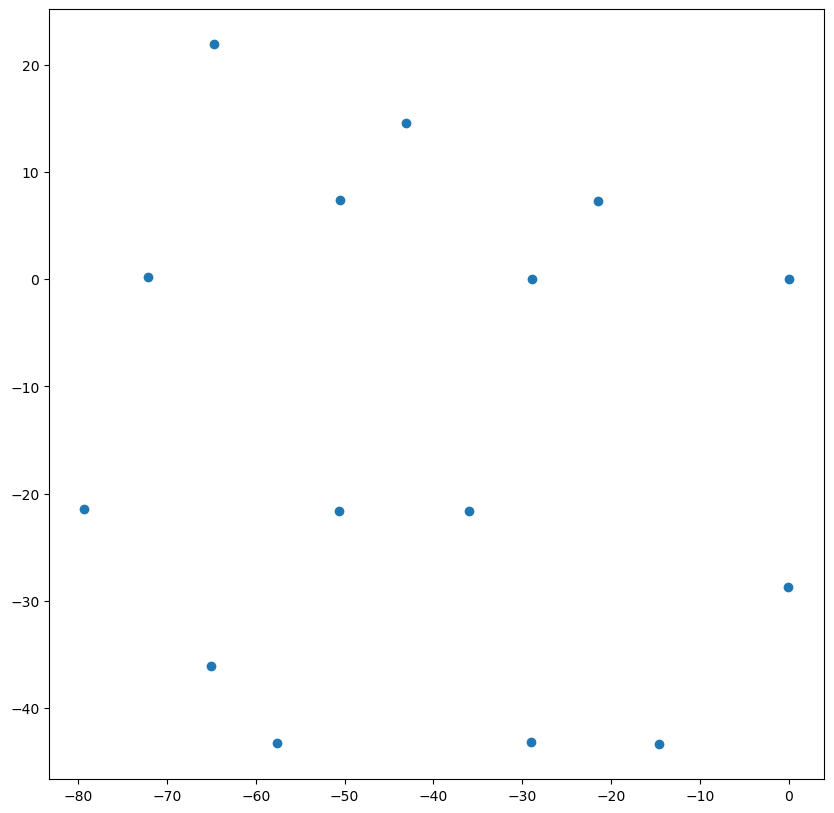

In [204]:
data = 'lau15_xy.txt'
xy = np.loadtxt(data)

x = [item[0] for item in xy]
y = [item[1] for item in xy]
plt.figure(figsize=(10,10))
plt.scatter(x,y)

    2.2. Creating of function

In [197]:
def distance(xy1, xy2):
    return np.sqrt(np.sum((xy2 - xy1) ** 2))

In [198]:
def distance_matrix_func(xy):
    distance_matrix = np.ones((xy.shape[0], xy.shape[0]))
    for i, xy1 in enumerate(xy):
        for j, xy2 in enumerate(xy):
            distance_matrix[i, j] = distance(xy1, xy2)
    return distance_matrix

In [199]:
def total_distance(distance_matrix):
    S = 0
    for i in range(14):
        S += distance_matrix[i + 1, i]
    S += distance_matrix[0,14]
    return S

    2.3. First iteration

Total distance:  818.0261064149839


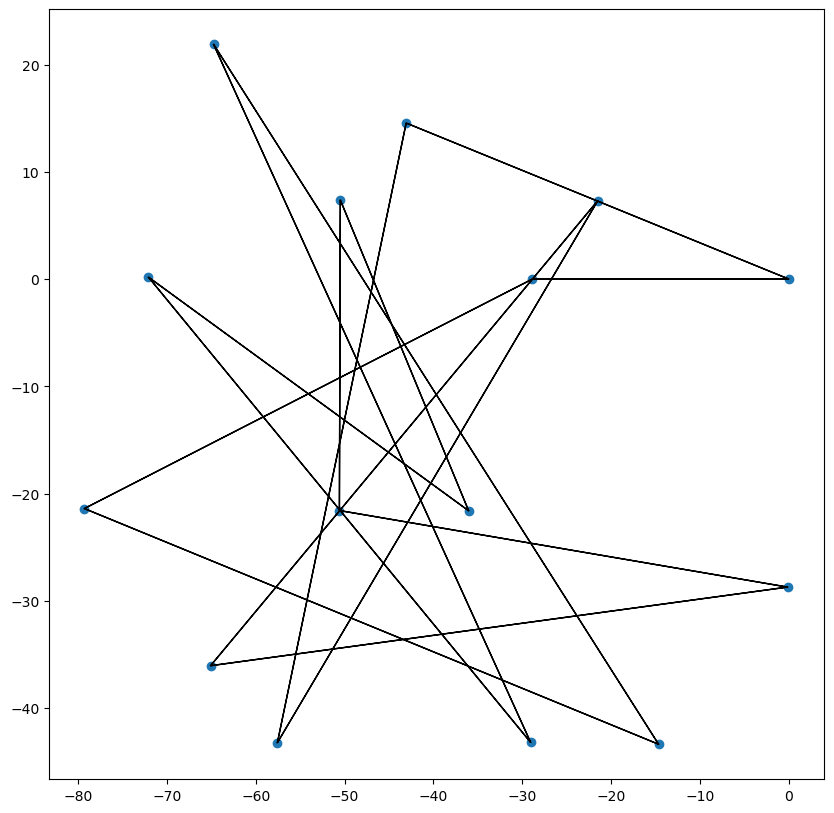

In [205]:
print('Total distance: ', total_distance(distance_matrix_func(xy)))
plt.figure(figsize=(10,10))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(xy[i][0],xy[i][1],xy[i+1][0]-xy[i][0],xy[i+1][1]-xy[i][1])
plt.arrow(xy[14][0],xy[14][1],xy[0][0]-xy[14][0],xy[0][1]-xy[14][1])

    2.4. Find solution

In [224]:
T = 100000
S_list = []
S = total_distance(distance_matrix_func(xy))
S_list.append(S)
i = 0
while S > 330:
    i += 1
    i_swap = random.sample(range(14), 2)
    xy_copy = copy.copy(xy)
    xy_temp = copy.copy(xy_copy[i_swap[0]])
    xy_copy[i_swap[0]] = xy_copy[i_swap[1]]
    xy_copy[i_swap[1]] = xy_temp
    S = total_distance(distance_matrix_func(xy_copy))
    S_list.append(S)
    if S_list[i] < S_list[i - 1]:
        xy = xy_copy
        T = T * 0.999
    else:
        delta = S_list[i] - S_list[i - 1]
        probability = np.exp(-delta / T)
        random_roll = random.uniform(0, 1)
        if random_roll < probability:
            xy = xy_copy
            T = T * 0.999

    2.5. Last iteration

Minimal distance:  325.9822137653893


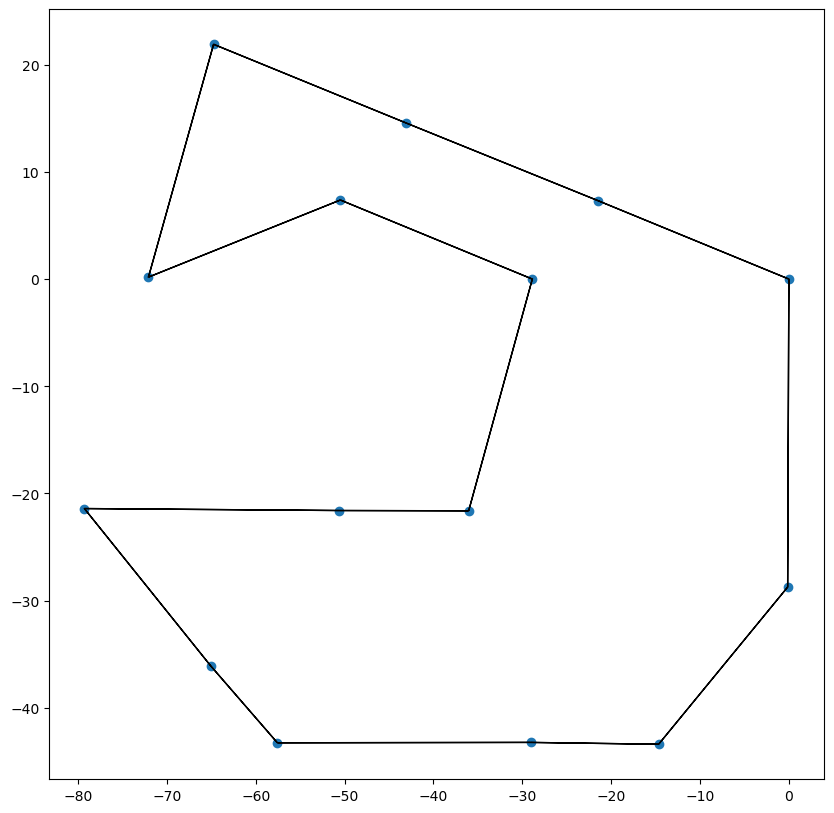

In [225]:
print('Minimal distance: ', total_distance(distance_matrix_func(xy)))
plt.figure(figsize=(10,10))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(xy[i][0],xy[i][1],xy[i+1][0]-xy[i][0],xy[i+1][1]-xy[i][1])
plt.arrow(xy[14][0],xy[14][1],xy[0][0]-xy[14][0],xy[0][1]-xy[14][1])

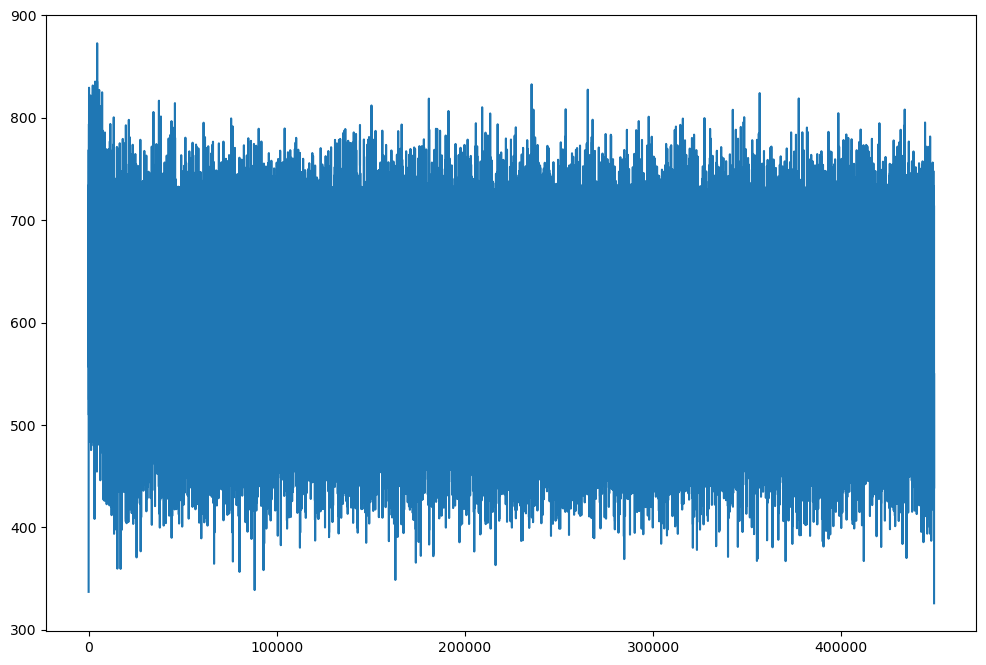

In [226]:
plt.figure(figsize=(12,8))
plt.plot(S_list)